In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [50]:
def linfunc(x,a):#Used for the fitting
    return a*x
def k_func(delta,theta):#From the paper, calculates the wavevector(magnitude) for a given theta and delta
    return (2*np.pi/(632.8*10**(-9)))*(np.sin((delta/2)*(np.sin(theta+(delta/2))+np.sin(theta-(delta/2)))))
def sigma_func(freq,k,dk,density,Plot=True):#All in one function that curve fits, determines parameters and plots given the data and errors
    popt,pcov=curve_fit(linfunc,freq,k**(3/2),sigma=1.5*dk*np.sqrt(k),absolute_sigma=True)
    print(popt,np.sqrt(pcov[0][0]))
    sigma=density/(popt[0]**2)
    #d_sigma=np.sqrt((pcov[0][0])*(4*(density**2)*(popt[0]**(-6))))
    d_sigma=(2/(popt[0]**3))*(density*np.sqrt(pcov[0][0]))
    print(r"$\sigma$","{:0.2f}mN/m\n".format(sigma*10**3))
    print(r"$\Delta \sigma=$","{:0.2f}mN/m\n".format(d_sigma*10**3))
    if Plot==True:
        plotspace=np.linspace(np.min(freq),np.max(freq),1000)
        plt.errorbar(freq,k**(3/2),yerr=1.5*dk*np.sqrt(k),fmt='o')
        plt.scatter(freq,k**(3/2),label="Data Points")
        plt.plot(plotspace,linfunc(plotspace,popt),label=f"$\\sigma={np.round(sigma*10**3,1)}(\\pm{np.round(d_sigma*10**3,1)})$mN/m")
        plt.fill_between(plotspace,linfunc(plotspace,popt-np.sqrt(pcov[0][0])),linfunc(plotspace,popt+np.sqrt(pcov[0][0])),alpha=0.2)
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.xlabel(r'$\omega$ (rad/s)')
        plt.ylabel(r'$k^{\frac{3}{2}}$(m${}^{-3/2})$')
    return
def error_func(delta,theta,d_delta_x):#Calculated using error prop using mathematica to get dk/d delta
    return 2*np.pi*np.sqrt((((d_delta_x**2)/(632.8*10**(-9))**2)*(np.cos(0.5*delta*\
            (-np.sin(0.5*delta-theta)+np.sin(0.5*delta+theta)))**2)*(0.5*delta*(-np.cos(0.5*delta-theta)+\
            np.cos(0.5*delta+theta))+0.5*(-np.sin(0.5*delta-theta)+np.sin(0.5*delta+theta)))**2))
  
    


[118.51269845] 1.2231527221966298
$\sigma$ 71.07mN/m

$\Delta \sigma=$ 1.47mN/m



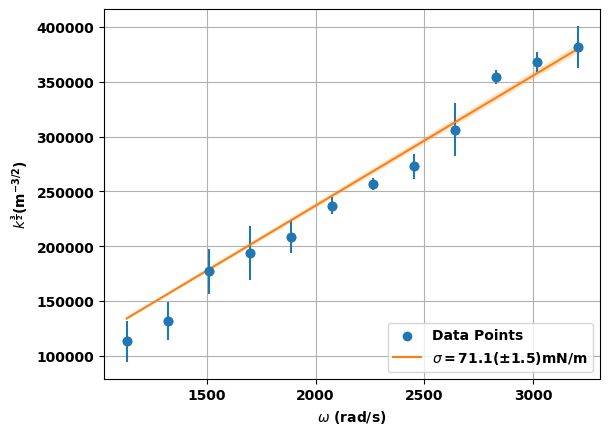

In [51]:
delta_x=np.array([13.9,15.4,18.75,19.9,20.9,22.75,24,25,27,29.75,30.5,31.25])*10**(-3)
d_delta_x=np.array([1.53,1.36,1.44,1.69,1.02,0.5,0.35,0.7,1.4,0.35,0.5,1.06])*10**(-3)
freq=np.array([180,210,240,270,300,330,360,390,420,450,480,510])*2*np.pi
length=5.5
height=(1620-1105)*10**(-3)
theta=np.arctan(height/length)
delta=delta_x/length
dk=np.array([257.508, 228.896, 242.36, 284.436, 171.671, 84.1525, 58.9067, \
117.813, 235.626, 58.9065, 84.152, 178.402])
sigma_func(freq,k_func(delta,theta),dk,998.2)


[119.75473435] 4.151227059690967
$\sigma$ 72.10mN/m

$\Delta \sigma=$ 5.00mN/m



Text(0.5, 1.0, '5% (w/w%) Salt Solution')

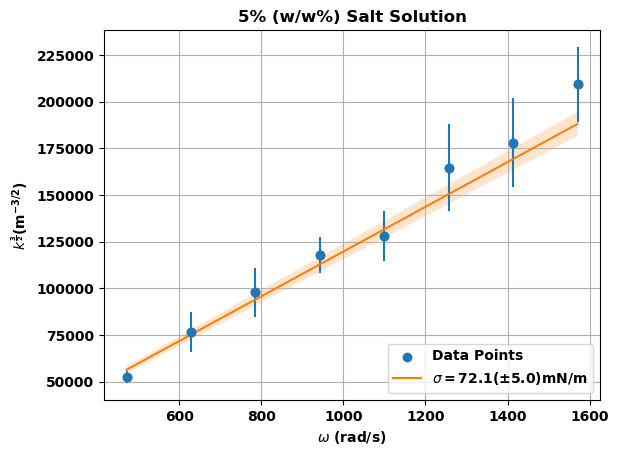

In [52]:
delta_x5a=np.array([8.75,11.25,13.25,15,15.86,18.75,19.75,22])*10**(-3)
d_delta_x5a=np.array([0.35,1.06,1.19,0.82,1.11,1.77,1.77,1.41])*10**(-3)
freq_5a=np.array([75,100,125,150,175,200,225,250])*2*np.pi
length_5a=5.5
height_5a=(1610-1120)*10**(-3)
theta_5a=np.arctan(height_5a/length_5a)
delta_5a=delta_x5a/length_5a
sigma_func(freq_5a,k_func(delta_5a,theta_5a),error_func(delta_5a,theta_5a,d_delta_x5a/length_5a),1034)
plt.title("5% (w/w%) Salt Solution")

[119.56377414] 3.3131939784616886
$\sigma$ 74.90mN/m

$\Delta \sigma=$ 4.15mN/m



Text(0.5, 1.0, '10% (w/w%) Salt Solution')

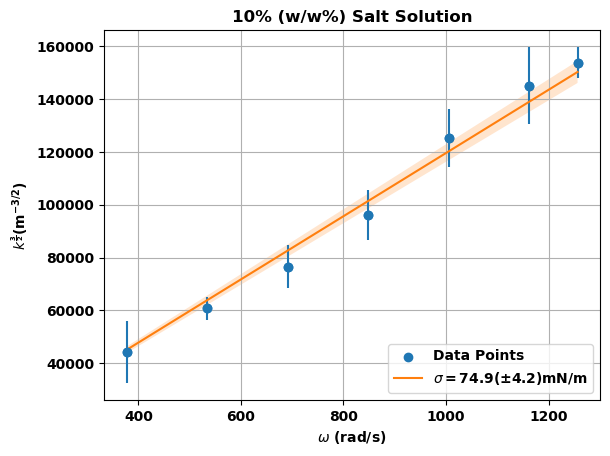

In [53]:
freq_10a=np.array([60,85,110,135,160,185,200])*2*np.pi
rawdx_10a=[[10,7],[10,11,10,11],[12,13,12,11,13.5,13,12.5,11],[12.5,15,14.5,15,13.5,15],[18,18,16,16],[17.5,20],[20,19]]
height_10a=1.57-1.120
length_10a=5.5
theta_10a=np.arctan(height_10a/length_10a)
delta_10a=np.array([np.average(x)/length_10a for x in rawdx_10a])*10**(-3)
#print(delta_10a)
d_delta_10a=np.array([np.std(x)/length_10a for x in rawdx_10a])*10**(-3)
sigma_func(freq_10a,k_func(delta_10a,theta_10a),error_func(delta_10a,theta_10a,d_delta_10a),1070.7)
plt.title("10% (w/w%) Salt Solution")

[122.11743584] 2.6856577481898714
$\sigma$ 74.43mN/m

$\Delta \sigma=$ 3.27mN/m



Text(0.5, 1.0, '15% (w/w%) Salt Solution')

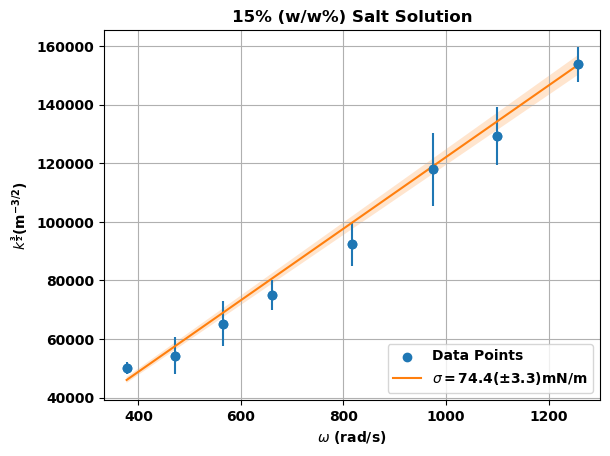

In [54]:
freq_15a=np.array([60,75,90,105,130,155,175,200])*2*np.pi
rawdx_15a=[[9,9.5],[9,9.5,11,9.5],[10,11.5,10,12.5,11,11],[12.5,11.5,12,12,13,11.5],[13,15,14,13.5],[14.5,15.5,16,17,18,17],\
           [16,17.5,17.5,18.5],[19,20]]
height_15a=1.57-1.120
length_15a=5.5
theta_15a=np.arctan(height_15a/length_15a)
delta_15a=np.array([np.average(x)/length_15a for x in rawdx_15a])*10**(-3)
#print(delta_10a)
d_delta_15a=np.array([np.std(x)/length_15a for x in rawdx_15a])*10**(-3)
sigma_func(freq_15a,k_func(delta_15a,theta_15a),error_func(delta_15a,theta_15a,d_delta_15a),1110)
plt.title("15% (w/w%) Salt Solution")
#w_space=np.linspace(380,1250,1000)
#plt.plot(w_space,np.sqrt(1110/(80*10**-3))*w_space)

[120.80800229] 1.9189527544964393
$\sigma$ 78.65mN/m

$\Delta \sigma=$ 2.50mN/m



Text(0.5, 1.0, '20% (w/w%) Salt Solution')

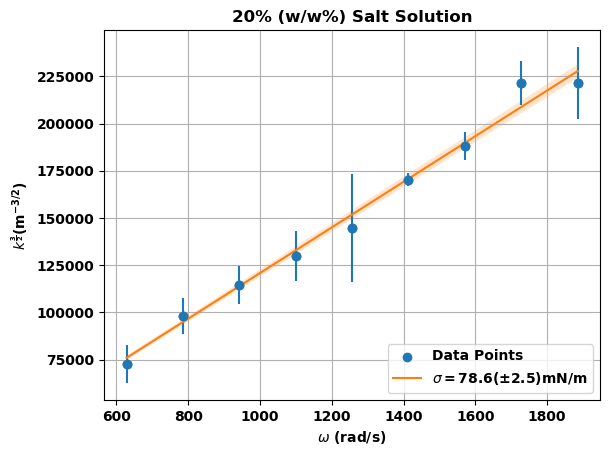

In [55]:
freq_20a=np.array([100,125,150,175,200,225,250,275,300])*2*np.pi
rawdx_20a=[[10.5,10.5,8.5,11,10,11.5],[12,14,12.5,12],\
           [14.5,14,12.5,14.5,15,13.5],[16,14.5,16.5,14],[18,14,19,14.5],[18.5,18],[20,19],[21,22.5],[20.5,23]]
height_20a=1.635-1.120
length_20a=5.5
theta_20a=np.arctan(height_20a/length_20a)
delta_20a=np.array([np.average(x)/length_20a for x in rawdx_20a])*10**(-3)
d_delta_20a=np.array([np.std(x)/length_20a for x in rawdx_20a])*10**(-3)
sigma_func(freq_20a,k_func(delta_20a,theta_20a),error_func(delta_20a,theta_20a,d_delta_20a),1147.8)
plt.title("20% (w/w%) Salt Solution")

[122.67513846] 3.6774663435599177
$\sigma$ 79.34mN/m

$\Delta \sigma=$ 4.76mN/m



Text(0.5, 1.0, '25% (w/w%) Salt Solution')

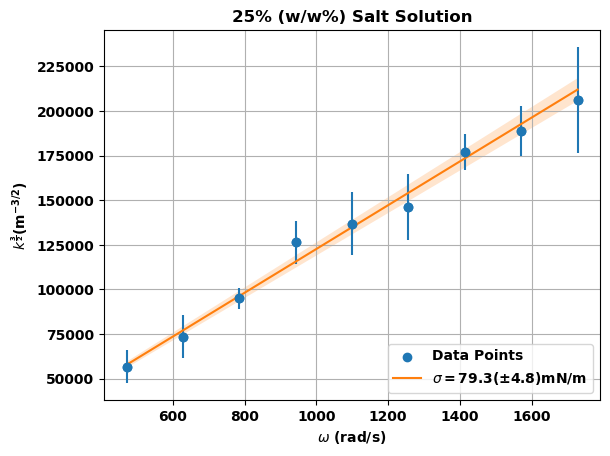

In [56]:
freq_25a=np.array([75,100,125,150,175,200,225,250,275])*2*np.pi
rawdx_25a=[[8.5,9.5,10,8,8,11,10,9.5],[9,9.5,12,12,10.5,12.5,12,11],[12.5,13,14,13],[15,17.5,16,15],[17,15.5,19,15.5],\
           [15.5,19.5,17,18],[19,20,21,19.5],[19.5,22,21.5,20],[19,24,24,21]]
height_25a=1.605-1.120
length_25a=5.5
theta_25a=np.arctan(height_25a/length_25a)
delta_25a=np.array([np.average(x)/length_25a for x in rawdx_25a])*10**(-3)
d_delta_25a=np.array([np.std(x)/length_25a for x in rawdx_25a])*10**(-3)
sigma_func(freq_25a,k_func(delta_25a,theta_25a),error_func(delta_25a,theta_25a,d_delta_25a),1194)
plt.title("25% (w/w%) Salt Solution")


[152.25521543] 8.84224322182495
$\sigma$ 43.06mN/m

$\Delta \sigma=$ 5.00mN/m



Text(0.5, 1.0, '1% (w/w%) Soap Solution')

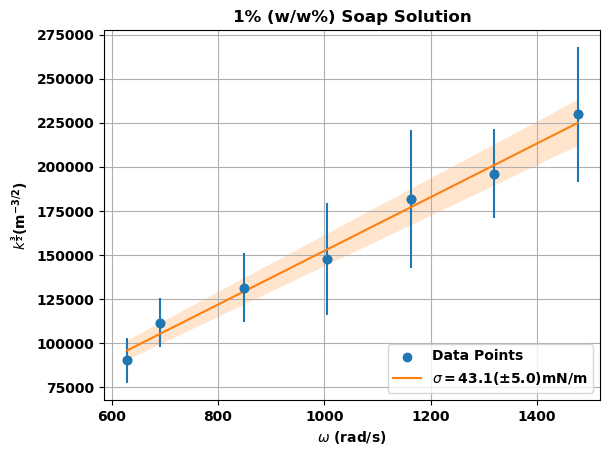

In [76]:
freq_1o=np.array([110,135,160,185,210,235,100])*2*np.pi
rawdx_1o=[[12.5,15,12.5,15,14.5],[13.5,14.5,17,17],[13,16.5,18,19.5],[16.5,22],[18.5,22],[20,25],[10,11,12,13,12,13,13.5]]
height_1o=1.63-1.120
length_1o=5.5
theta_1o=np.arctan(height_1o/length_1o)
delta_1o=np.array([np.average(x)/length_1o for x in rawdx_1o])*10**(-3)
d_delta_1o=np.array([np.std(x)/length_1o for x in rawdx_1o])*10**(-3)
sigma_func(freq_1o,k_func(delta_1o,theta_1o),error_func(delta_1o,theta_1o,d_delta_1o),998.2)
plt.title("1% (w/w%) Soap Solution")

[158.78237358] 4.770840074914741
$\sigma$ 39.59mN/m

$\Delta \sigma=$ 2.38mN/m



Text(0.5, 1.0, '3% (w/w%) Soap Solution')

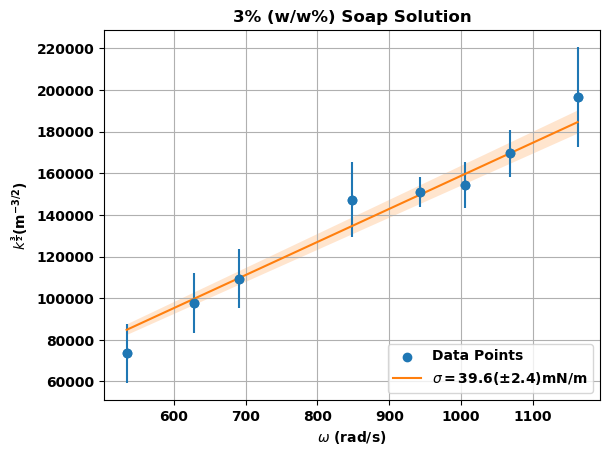

In [77]:
freq_3o=np.array([85,110,135,160,185,100,150,170])*2*np.pi
rawdx_3o=[[10.5,11.5,9,9,8],[11,13,13.5],[16.5,14],[16.5,15],[17,20],[12.5,10.5,10,12,13],[15,16],[17.5,16]]
height_3o=1.68-1.120
length_3o=5.5
theta_3o=np.arctan(height_3o/length_3o)
delta_3o=np.array([np.average(x)/length_3o for x in rawdx_3o])*10**(-3)
d_delta_3o=np.array([np.std(x)/length_3o for x in rawdx_3o])*10**(-3)
sigma_func(freq_3o,k_func(delta_3o,theta_3o),error_func(delta_3o,theta_3o,d_delta_3o),998.2)
plt.title("3% (w/w%) Soap Solution")

[171.31950416] 2.306284836620811
$\sigma$ 34.01mN/m

$\Delta \sigma=$ 0.92mN/m



Text(0.5, 1.0, '5% (w/w%) Soap Solution')

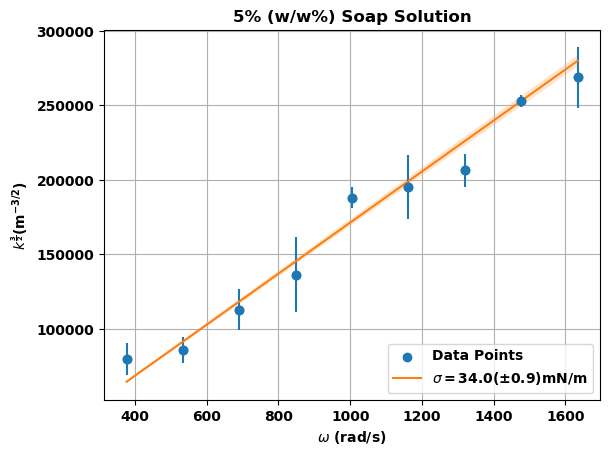

In [78]:
freq_5o=np.array([60,85,110,135,160,185,210,235,260])*2*np.pi
rawdx_5o=[[10,12,10,12],[10.5,11,12,11,12.5,12.5],[12.5,13,15,15],[12.5,16,17,17.5],[19,20],[18,20.5,21.5],[20,21.5],[24,23.5],[23.5,26]]
height_5o=1.635-1.120
length_5o=5.5
theta_5o=np.arctan(height_5o/length_5o)
delta_5o=np.array([np.average(x)/length_5o for x in rawdx_5o])*10**(-3)
d_delta_5o=np.array([np.std(x)/length_5o for x in rawdx_5o])*10**(-3)
sigma_func(freq_5o,k_func(delta_5o,theta_5o),error_func(delta_5o,theta_5o,d_delta_5o),998.2)
plt.title("5% (w/w%) Soap Solution")

[171.35196519] 3.894610645266761
$\sigma$ 34.00mN/m

$\Delta \sigma=$ 1.55mN/m



Text(0.5, 1.0, '10% (w/w%) Soap Solution')

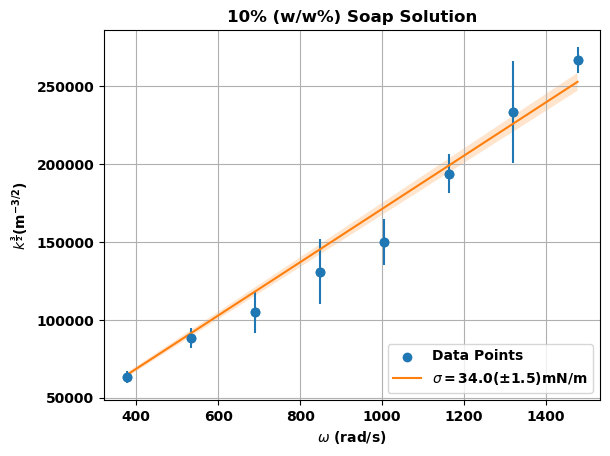

In [79]:
freq_10o=np.array([60,85,110,135,160,185,210,235])*2*np.pi
rawdx_10o=[[9,9.5,9,8.5],[10.5,12,11.5,11],[11,12.5,13,14],[12,15.5,16,15],[15,16.5,17.5,15],[18,20,19],[19.5,23.5],[24,23]]
height_10o=1.66-1.120
length_10o=5.5
theta_10o=np.arctan(height_10o/length_10o)
delta_10o=np.array([np.average(x)/length_10o for x in rawdx_10o])*10**(-3)
d_delta_10o=np.array([np.std(x)/length_10o for x in rawdx_10o])*10**(-3)
sigma_func(freq_10o,k_func(delta_10o,theta_10o),error_func(delta_10o,theta_10o,d_delta_10o),998.2)
plt.title("10% (w/w%) Soap Solution")

[173.43841198] 3.146529794901601
$\sigma$ 33.18mN/m

$\Delta \sigma=$ 1.20mN/m



Text(0.5, 1.0, '15% (w/w%) Soap Solution')

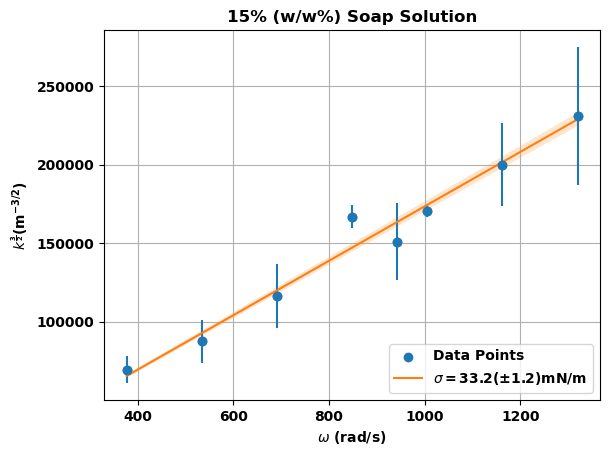

In [80]:
freq_15o=np.array([60,85,110,135,160,185,210,150])*2*np.pi
rawdx_15o=[[8.5,10,10,10,8.5,10,10,11],[10,12,13,10.5],[11,14.5,14.5,15],[17,18],[17.5,18],[18,21.5],[19,24.5],[14,16.5,19,16]]
height_15o=1.65-1.120
length_15o=5.5
theta_15o=np.arctan(height_15o/length_15o)
delta_15o=np.array([np.average(x)/length_15o for x in rawdx_15o])*10**(-3)
d_delta_15o=np.array([np.std(x)/length_15o for x in rawdx_15o])*10**(-3)
sigma_func(freq_15o,k_func(delta_15o,theta_15o),error_func(delta_15o,theta_15o,d_delta_15o),998.2)
plt.title("15% (w/w%) Soap Solution")

[180.5206288] 2.5294997089444546
$\sigma$ 30.63mN/m

$\Delta \sigma=$ 0.86mN/m



Text(0.5, 1.0, '20% (w/w%) Soap Solution')

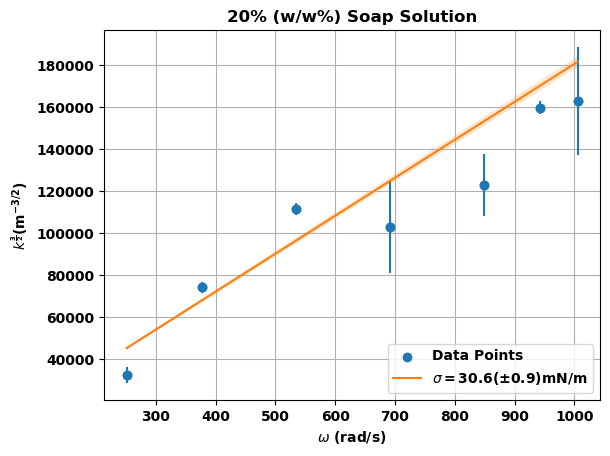

In [81]:
freq_20o=np.array([60,85,110,135,160,40,150])*2*np.pi
rawdx_20o=[[11,11.5],[14.5,15],[11.5,14,13.5,17],[14.5,17],[17,21],[6,7],[18.5,19]]
height_20o=1.60-1.120
length_20o=5.5
theta_20o=np.arctan(height_20o/length_20o)
delta_20o=np.array([np.average(x)/length_20o for x in rawdx_20o])*10**(-3)
d_delta_20o=np.array([np.std(x)/length_20o for x in rawdx_20o])*10**(-3)
sigma_func(freq_20o,k_func(delta_20o,theta_20o),error_func(delta_20o,theta_20o,d_delta_20o),998.2)
plt.title("20% (w/w%) Soap Solution")
#w_space=np.linspace(250,1050,1000)
#plt.plot(w_space,np.sqrt(997/(40E-3))*w_space)

[171.32707385] 3.79456525326402
$\sigma$ 34.01mN/m

$\Delta \sigma=$ 1.51mN/m



Text(0.5, 1.0, '25% (w/w%) Soap Solution')

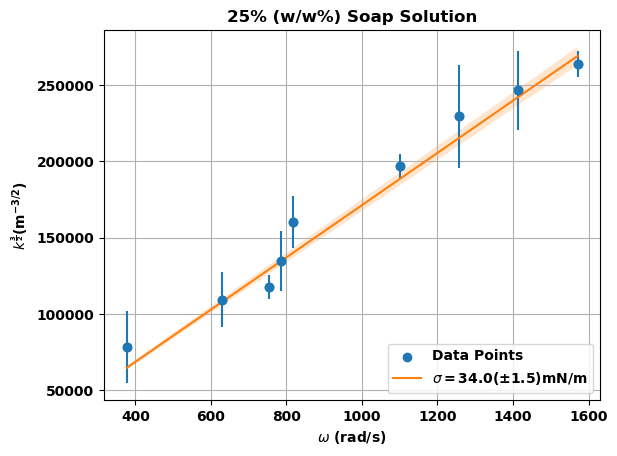

In [82]:
freq_25o=np.array([60,125,100,130,175,200,225,250,120])*2*np.pi
rawdx_25o=[[8,12],[12,15,15,15.5],[10,12.5,12.5,14,13.5],[15,15,17,17.5],[19,18],[18.5,22.5],[20,23],[22,23],[13.5,12.5,13.5,13,14,13,12,13.5]]
height_25o=1.68-1.120
length_25o=5.5
theta_25o=np.arctan(height_25o/length_25o)
delta_25o=np.array([np.average(x)/length_25o for x in rawdx_25o])*10**(-3)
d_delta_25o=np.array([np.std(x)/length_25o for x in rawdx_25o])*10**(-3)
sigma_func(freq_25o,k_func(delta_25o,theta_25o),error_func(delta_25o,theta_25o,d_delta_25o),998.2)
plt.title("25% (w/w%) Soap Solution")

[150.39217345] 1.63895882261594
$\sigma$ 52.88mN/m

$\Delta \sigma=$ 1.15mN/m



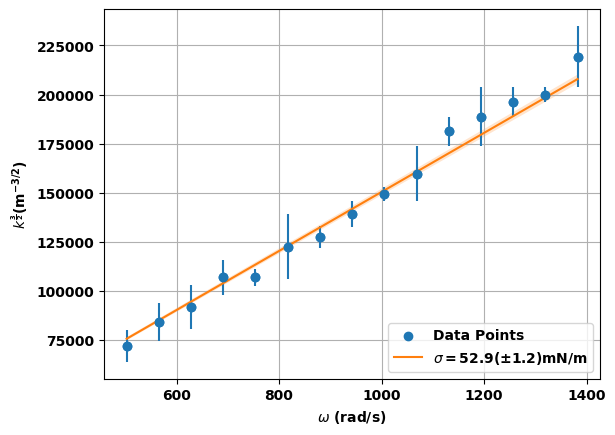

In [91]:
freq_OJ=np.array([80,90,100,110,120,130,140,150,160,170,180,190,200,210,220])*2*np.pi
rawdx_OJ=[[8.5,10,10.5,10,10,11],[11.5,9.5,11.5,10.5,12,11.5],[10.5,11.5,11,11.5,13,13],[13,12,13,14],[12.5,13,13,13.5],[15,13,16,13],\
          [14.5,14,15,15],[15,16],[16,16.5],[16,18],[19,18],[18,20],[19,20],[20,19.5],[20,22]]
height_OJ=1.65-1.120
length_OJ=5.5
theta_OJ=np.arctan(height_OJ/length_OJ)
delta_OJ=np.array([np.average(x)/length_OJ for x in rawdx_OJ])*10**(-3)
d_delta_OJ=np.array([np.std(x)/length_OJ for x in rawdx_OJ])*10**(-3)
sigma_func(freq_OJ,k_func(delta_OJ,theta_OJ),error_func(delta_OJ,theta_OJ,d_delta_OJ),1196)

[ 0.34417702 70.9803027 ] 0.11916763086869572 1.4055715446420955


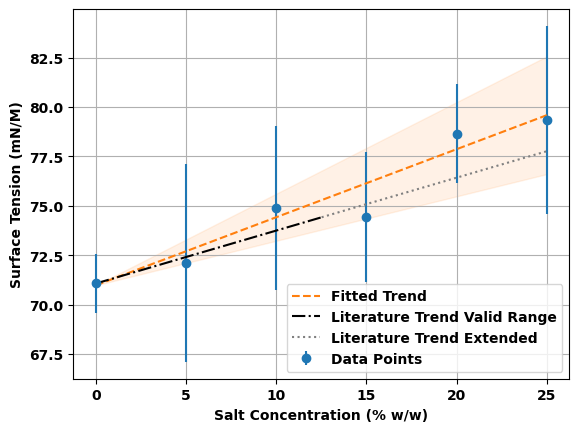

In [75]:
sigma_a=[71.07,72.1,74.9,74.43,78.65,79.34]
dsigma_a=[1.47,5,4.15,3.27,2.5,4.76]
conc_a=[0,5,10,15,20,25]
plt.errorbar(conc_a,sigma_a,yerr=dsigma_a,fmt='o',label='Data Points')
plt.grid(True)
plt.xlabel("Salt Concentration (% w/w)")
plt.ylabel("Surface Tension (mN/M)")
def Linfunc2(x,a,b):
    return a*x + b
popt_a,pcov_a=curve_fit(Linfunc2,conc_a,sigma_a,sigma=dsigma_a,absolute_sigma=True)
conc_space=np.linspace(0,25,1000)
plt.plot(conc_space,Linfunc2(conc_space,popt_a[0],popt_a[1]),ls="--",color='#ff7f0e',label='Fitted Trend')
plt.fill_between(conc_space,Linfunc2(conc_space,popt_a[0]-np.sqrt(pcov_a[0][0]),popt_a[1]),\
                 Linfunc2(conc_space,popt_a[0]+np.sqrt(pcov_a[0][0]),popt_a[1]),alpha=0.1,color='#ff7f0e')
print(popt_a,np.sqrt(pcov_a[0][0]),np.sqrt(pcov_a[1][1]))
plt.plot(conc_space[0:500],71.07*(1+(3.766*10**(-3))*conc_space[0:500]),color='black',ls='-.',label='Literature Trend Valid Range')
plt.plot(conc_space[500:],71.07*(1+(3.766*10**(-3))*conc_space[500:]),color='gray',ls=':',label='Literature Trend Extended')
plt.legend(loc='lower right')

Text(0, 0.5, 'Surface Tension (mN/M)')

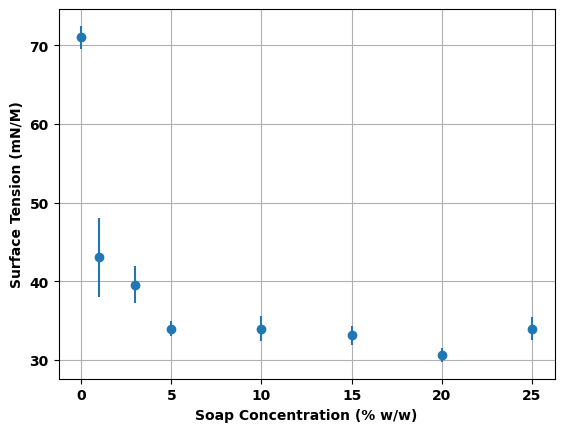

In [83]:
sigma_o=[70.98,43.06,39.59,34.01,34.00,33.18,30.63,34.01]
dsigma_o=[1.47,5,2.38,0.92,1.55,1.2,0.86,1.51]
conc_o=[0,1,3,5,10,15,20,25]
plt.errorbar(conc_o,sigma_o,yerr=dsigma_o,fmt='o')
plt.grid(True)
plt.xlabel("Soap Concentration (% w/w)")
plt.ylabel("Surface Tension (mN/M)")